![Logo](data/AA_Logo.png)

# Introduction

<hr/>

Before using of AppliedAlpha quantitative research framework it should initialized.

In [1]:
import ira
%alphalab dark
# following directive if you want to use light theme for plots 
# %alphalab light

> `%alphalab` magic command adds most used imports (like pandas, numpy etc so no need to do it)

In [9]:
pd.DataFrame(np.random.randn(2, 8))

,0,1,2,3,4,5,6,7
0,-1.145063,0.802793,1.204998,0.666713,1.109579,0.666906,-0.899990,0.854196
1,1.664295,0.075861,-1.308502,-1.164128,-0.366528,-1.115347,0.138858,-2.043547


# Operational Storage

<hr/>

For storing some most used data we use MongoDB database. This can be used for storing any data and computations results.

Each object in database has unique id (as string).

To get list of first 10 stored objects with id starts from b we can use `z_ls()` command:

In [202]:
z_ls('b.*')[:10]

['binance::1M_ohlc_MDXUSDT',
 'bitmex::XBTUSD_1s',
 'binance::_info_',
 'binance::1M_ohlc_NUUSDT',
 'binance::1M_ohlc_MASKUSDT',
 'binance::1M_ohlc_POLSUSDT',
 'binance::1M_ohlc_LPTUSDT']

Now we create new object and store it into DB:

In [203]:
obj = pd.DataFrame({'a':[1,1,2,3,5,8,12], 'b':[1,2,3,4,5,6,7]})
print(obj)

# store created object to database
z_save('My_Custom_Object', obj)

In [204]:
z_ls('My_.*')

['My_Custom_Object']

We can load object from database

In [205]:
obj1 = z_ld('My_Custom_Object')

all(obj1 == obj)

True

And finally remove it from database

In [206]:
z_del('My_Custom_Object')
z_ls('My_.*')

[]

# Plotting utils

<hr/>

## Matplotlib utils

There are set of plotting utilities defined in ira.charting.plot_helpers module

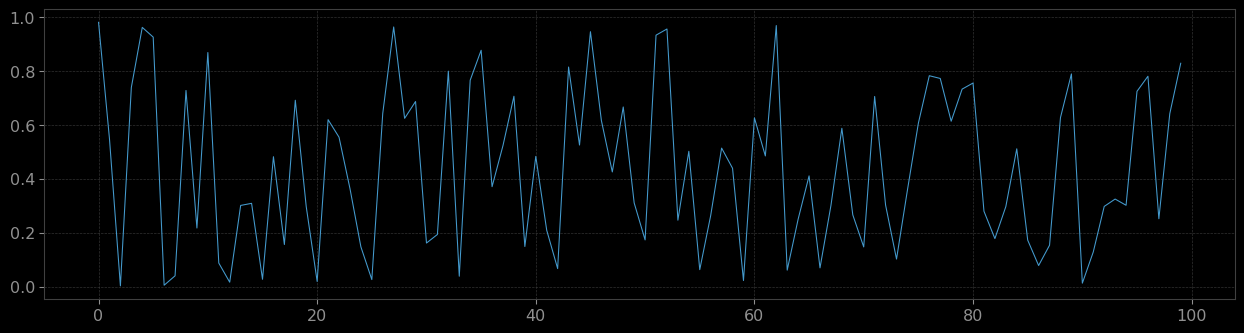

In [16]:
# fig() - shortcut for plt.figure(...) function
fig(16, 4)
plt.plot(np.random.rand(100))

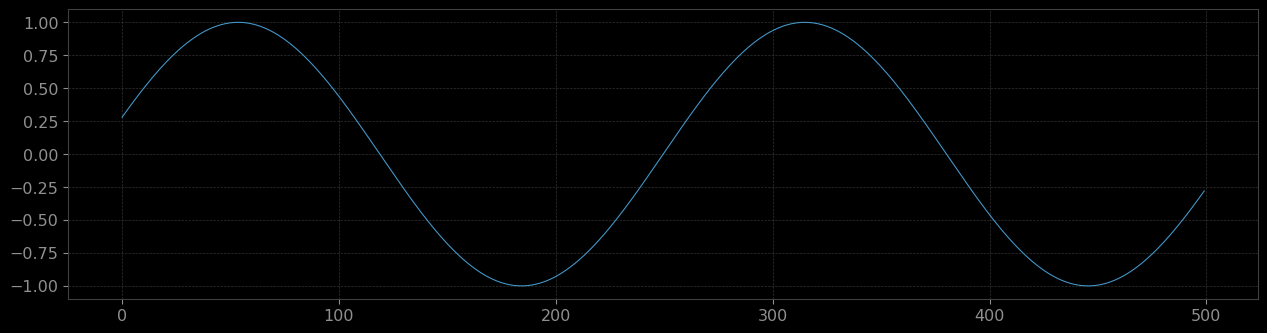

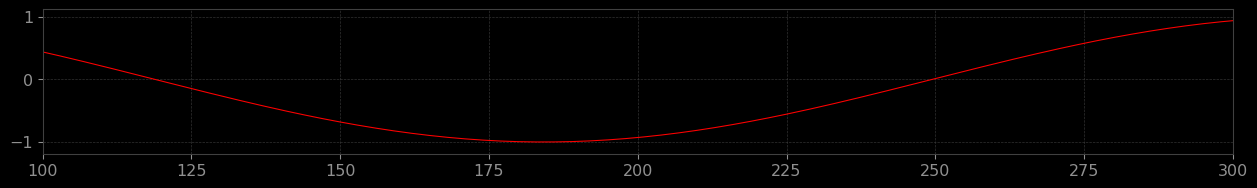

In [18]:
# zoomx() allows to zoom desired range of chart by X axis

fig(16, 4)
plt.plot(np.sin(np.linspace(-6,6, 500)))

# second figure is zoomed chart
f1 = fig(16,2)
plt.plot(np.sin(np.linspace(-6,6, 500)), 'r')

zoomx(100, 300, figure=f1)

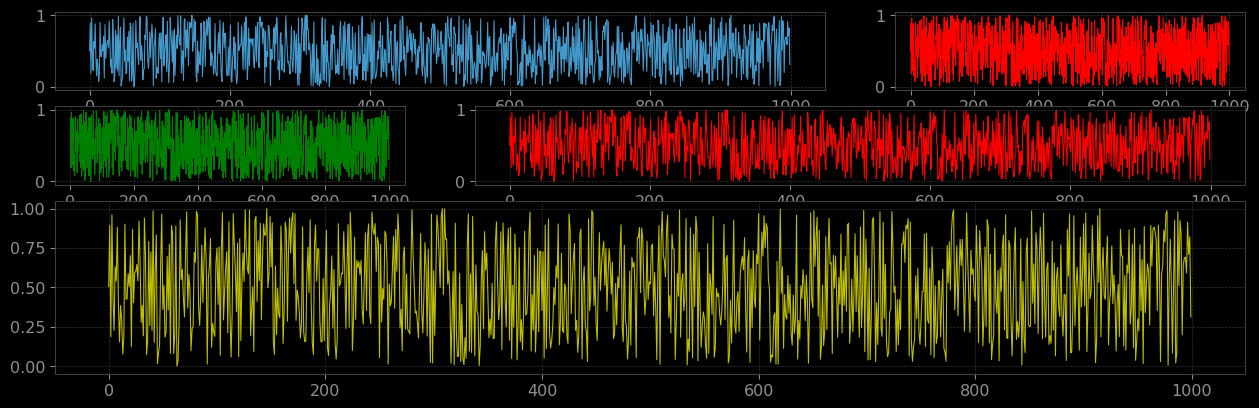

In [21]:
# sbp() - handy grid plotting

fig(16, 5)
yy = np.random.rand(1000)
sbp(43, 1, c=2); 
plt.plot(yy)

sbp(43, 3); 
plt.plot(yy, 'r')

sbp(43, 4); 
plt.plot(yy, 'g')

sbp(43, 5, c=2); 
plt.plot(yy, 'r')

sbp(43, 7, r=2, c=3); 
plt.plot(yy, 'y')

> ACF / PACF helpers

/usr/local/envs/ira_p36/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:671: FutureWarning:

fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.



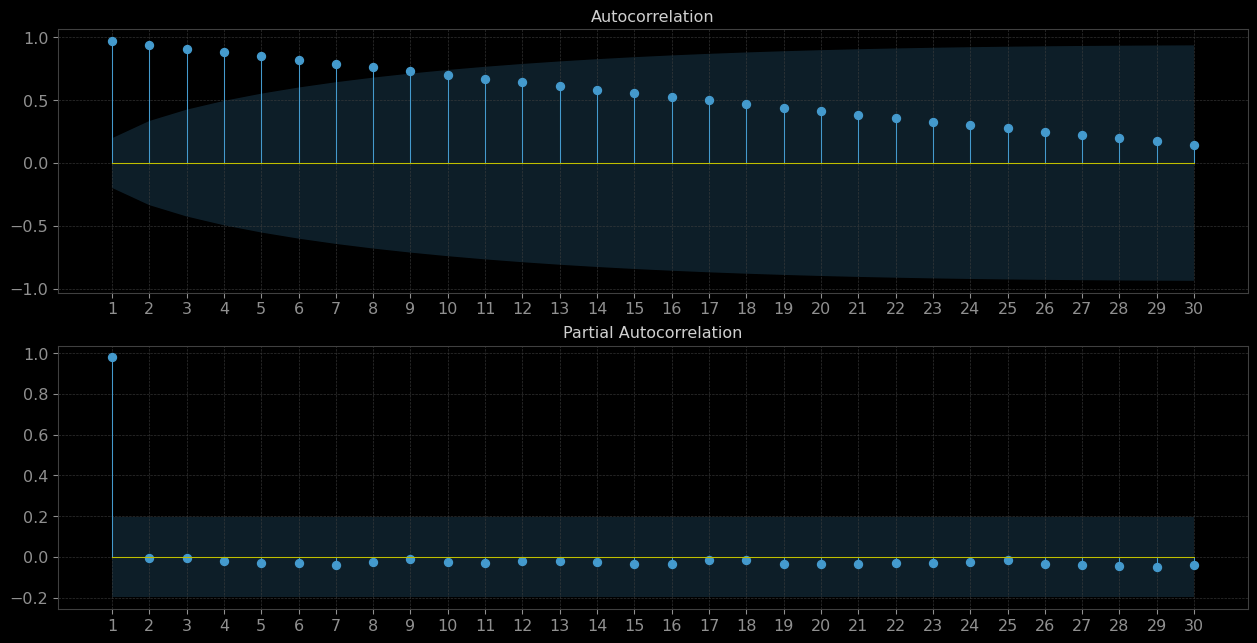

In [146]:
fig(16, 8)
e = pd.Series(np.random.rand(100))
ar1 = e + 1 * e.shift(1)
sbp(21,1); plot_acf(ar1.cumsum())
sbp(21,2); plot_pacf(ar1.cumsum())

## Plotly utils

<hr/>

It's possible to use plotly package for charting data. Let's generate some dataset:

In [77]:
data = pd.DataFrame(
    { 
        'x': np.random.randn(1000).cumsum(),
        'y': np.random.randn(1000).cumsum(), 
        'z': np.random.randn(1000).cumsum(), 
    }, 
    index=pd.date_range('2020-01-01', periods=1000, freq='1D')
) 

Now create specification on what to chart:

In [451]:
g0 = LookingGlass(data)

<hr/>

> Plot all data

<hr/>

In [79]:
g0.look()

FigureWidget({
    'data': [{'line': {'dash': 'solid', 'width': 0.5},
              'mode': 'lines',
         …

<hr/>

> Plot range of data

<hr/>

In [83]:
g0.look('Jul-2020', 'Sep-2020')

FigureWidget({
    'data': [{'line': {'dash': 'solid', 'width': 0.5},
              'mode': 'lines',
         …

> Look at specified index 

In [88]:
g0.look('4w', '2020-Aug-01', '4w', title="What's happened 4 weeks before and after ?")

FigureWidget({
    'data': [{'line': {'dash': 'solid', 'width': 0.5},
              'mode': 'lines',
         …

<hr/>

> Let's add some studies

<hr/>

In [130]:
d1 = np.sqrt(abs(data.x))/3
d2 = data.y - data.z

g1 = LookingGlass(data, {
    
    # first study (separated subplot at bottom)
    'Study0': [
        d1.rename('S1'),
        'red --', min(d1), # minimal value as dashed red line
        'green :', max(d1) # maximal value as dotted green line
    ],
    
    'Study1': [
        'yellow', d2.rename('Y - Z')
    ]
    
    })

In [131]:
g1.look(title='Studies Example')

FigureWidget({
    'data': [{'line': {'dash': 'solid', 'width': 0.5},
              'mode': 'lines',
         …

<hr/>

# Plot OHLC data

<hr/>

In [214]:
p_data = z_ld('nyse::MDU_d')
p_data.head(2)

,open,high,low,close,volume
date,,,,,
2005-01-03,13.430,13.470,13.150,13.18,391900
2005-01-04,13.285,13.325,13.105,13.11,342800


We can use MPL function for charting data
<hr/>

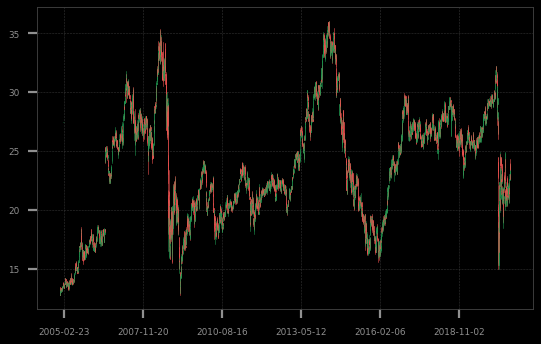

In [216]:
ohlc_plot(p_data);

Or plotly library
<hr/>

In [220]:
g2 = LookingGlass(p_data)

In [221]:
g2.look()

FigureWidget({
    'data': [{'close': array([13.18 , 13.11 , 12.885, ..., 23.27 , 23.02 , 22.67 ]),
          …

# Some handy data helpers

<hr/>

> Modifiable structure (mstruct)

This allows to attach new properties (fields) dynamically

In [9]:
s = mstruct(field1='some data')
s

mstruct(field1='some data')

It's possible to attach new properties on the fly

In [10]:
s.field2 = 'some data 2'
s.field3 = [1,2,3]
s.field4 = mstruct(x=1, y=2)

print(s)

In [19]:
s.field4.x = 14
print(s)

mstruct object can be converted to dictionary

In [20]:
s.to_dict()

{'field1': 'some data',
 'field2': 'some data 2',
 'field3': [1, 2, 3],
 'field4': {'x': 14, 'y': 2}}

Dictionary also can be converted to mstructs:

In [21]:
print(dict2struct(s.to_dict()))

> Join by columns axis `scols`

In [273]:
p1 = pd.DataFrame({'a': [1,2,4,5]})
p2 = pd.DataFrame({'b': [11,21,41,51,66]})
p3 = pd.DataFrame({'c': [-1,-2]})

scols(p1, p2, p3)

,a,b,c
0,1.0,11,-1.0
1,2.0,21,-2.0
2,4.0,41,NaN
3,5.0,51,NaN
4,NaN,66,NaN


Rename after joining
<hr/>

In [274]:
scols(p1, p2, p3, names=['new_a', 'new_b', 'new_c'])

,new_a,new_b,new_c
0,1.0,11,-1.0
1,2.0,21,-2.0
2,4.0,41,NaN
3,5.0,51,NaN
4,NaN,66,NaN


Multiindex
<hr/>

In [289]:
m = scols(scols(p1, p2, p3), scols(0.1*p1, 0.5*p2, 0.4*p3).mean(axis=1), keys=['A', 'B'])
m

A                   B
     a   b    c          0
0  1.0  11 -1.0   1.733333
1  2.0  21 -2.0   3.300000
2  4.0  41  NaN  10.450000
3  5.0  51  NaN  13.000000
4  NaN  66  NaN  33.000000

In [288]:
m.A.sub(m.B[0], axis=0)

,a,b,c
0,-0.733333,9.266667,-2.733333
1,-1.300000,17.700000,-5.300000
2,-6.450000,30.550000,NaN
3,-8.000000,38.000000,NaN
4,NaN,33.000000,NaN


<hr/>

> Join by rows axis `srows`

<hr/>

In [309]:
r1 = pd.Series(np.arange(0, 5), index=pd.date_range('10:00', periods=5, freq='10Min')) 
r2 = pd.Series(np.arange(10, 15), index=pd.date_range('9:00', periods=5, freq='30Min')) 
srows(r1, r2)

2021-11-03 09:00:00    10
2021-11-03 09:30:00    11
2021-11-03 10:00:00     0
2021-11-03 10:00:00    12
2021-11-03 10:10:00     1
2021-11-03 10:20:00     2
2021-11-03 10:30:00     3
2021-11-03 10:30:00    13
2021-11-03 10:40:00     4
2021-11-03 11:00:00    14
dtype: int64

In [311]:
# no sorting
srows(r1, r2, sort=False)

2021-11-03 10:00:00     0
2021-11-03 10:10:00     1
2021-11-03 10:20:00     2
2021-11-03 10:30:00     3
2021-11-03 10:40:00     4
2021-11-03 09:00:00    10
2021-11-03 09:30:00    11
2021-11-03 10:00:00    12
2021-11-03 10:30:00    13
2021-11-03 11:00:00    14
dtype: int64

In [316]:
# we can see that there are same records for 10:00 and 10:30, we can keep first | last only
scols(srows(r1, r2, keep='first'),  srows(r1, r2, keep='last'))

,0,1
2021-11-03 09:00:00,10,10
2021-11-03 09:30:00,11,11
2021-11-03 10:00:00,0,12
2021-11-03 10:10:00,1,1
2021-11-03 10:20:00,2,2
2021-11-03 10:30:00,3,13
2021-11-03 10:40:00,4,4
2021-11-03 11:00:00,14,14


<hr/>

> Duplicated indexes processing

<hr/>

In [379]:
y1 = pd.DataFrame(
    [1,2,3, 222, 333],
    index=map(pd.Timestamp, ['10:00', '11:00', '12:00', '11:00', '12:00'])).sort_index()
y1

,0
2021-11-03 10:00:00,1
2021-11-03 11:00:00,2
2021-11-03 11:00:00,222
2021-11-03 12:00:00,3
2021-11-03 12:00:00,333


In [381]:
drop_duplicated_indexes(y1, keep='first')

,0
2021-11-03 10:00:00,1
2021-11-03 11:00:00,2
2021-11-03 12:00:00,3


In [382]:
drop_duplicated_indexes(y1, keep='last')

,0
2021-11-03 10:00:00,1
2021-11-03 11:00:00,222
2021-11-03 12:00:00,333


If we need to keep all values but at unique time index:
<hr/>

In [387]:
from ira.analysis.tools import process_duplicated_indexes

process_duplicated_indexes(y1)

,0
2021-11-03 10:00:00.000000000,1
2021-11-03 11:00:00.000000000,2
2021-11-03 11:00:00.000000001,222
2021-11-03 12:00:00.000000000,3
2021-11-03 12:00:00.000000001,333


<hr/>

> Handy util for working with OHLC data 

<hr/>

If we have many ohlc dataframes and need to extract only Closes prices presented as single table:

In [401]:
h1 = z_ld('nasdaq::NFLX_d')
h2 = z_ld('nasdaq::AAPL_d')
h3 = z_ld('nasdaq::FB_d')

In [403]:
h1.head()

,open,high,low,close,volume
date,,,,,
2005-01-03,1.7829,1.8000,1.6457,1.7029,1637955
2005-01-04,1.7029,1.7071,1.6071,1.6657,2482076
2005-01-05,1.6771,1.6771,1.5843,1.6000,1820097
2005-01-06,1.6000,1.6243,1.5729,1.5786,1181874
2005-01-07,1.5871,1.6500,1.5714,1.5886,1075288


In [404]:
h2.head()

,open,high,low,close,volume
date,,,,,
2005-01-03,4.6271,4.6507,4.4714,4.5207,24764860
2005-01-04,4.5571,4.6764,4.4979,4.5671,39216480
2005-01-05,4.5964,4.6607,4.5750,4.6071,24315750
2005-01-06,4.6204,4.6364,4.5236,4.6107,25209930
2005-01-07,4.6429,4.9736,4.6250,4.9464,79847540


In [405]:
h3.head()

,open,high,low,close,volume
date,,,,,
2012-05-18,42.05,45.00,38.00,38.23,580587800
2012-05-21,36.53,36.66,33.00,34.03,168309800
2012-05-22,32.61,33.59,30.94,31.00,102053800
2012-05-23,31.37,32.50,31.36,32.00,73721100
2012-05-24,32.95,33.21,31.77,33.03,50275800


In [413]:
closes = retain_columns_and_join({'NFLX': h1, 'AAPL': h2, 'FB': h3}, 'close')
closes.head()

,NFLX,AAPL,FB
date,,,
2005-01-03,1.7029,4.5207,NaN
2005-01-04,1.6657,4.5671,NaN
2005-01-05,1.6000,4.6071,NaN
2005-01-06,1.5786,4.6107,NaN
2005-01-07,1.5886,4.9464,NaN


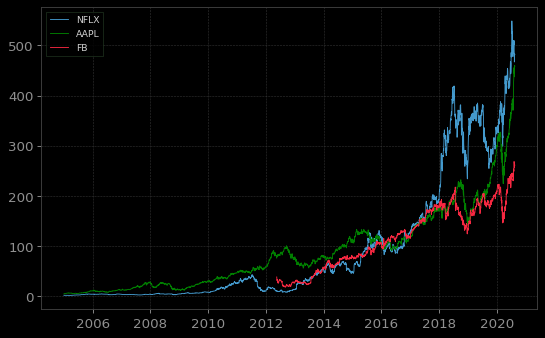

In [417]:
plt.plot(closes)
plt.legend(closes.columns)

<hr/>
Plot all series at same scale
<hr/>

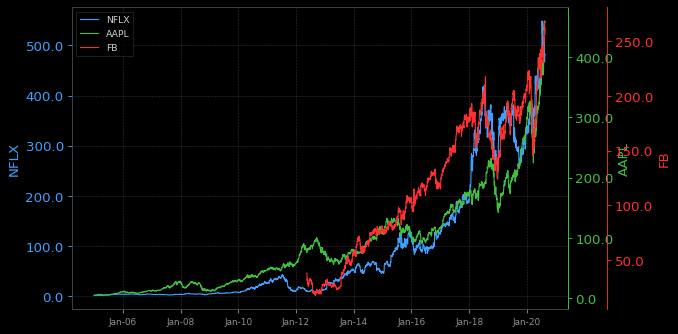

In [430]:
multiplot(closes, x_format='%b-%y')

<hr/>

> Rolling window on dataframe

<hr/>

In [434]:
from ira.analysis.tools import roll

roll(pd.DataFrame(np.random.randn(10, 3), index=list('ABCDEFGHIJ')), 5).apply(print)

""


# Technical Analysis stuff

<hr/>

It's possible to use different TA functions on financial data.
Most frequently used TA functions can be found in `ira.analysis.timeseries` module:

In [229]:
help(ira.analysis.timeseries)

Help on module ira.analysis.timeseries in ira.analysis:

NAME
    ira.analysis.timeseries

FUNCTIONS
    adx(ohlc, period, smoother=<function kama at 0x7f586779e730>, as_frame=False)
        Average Directional Index.
        
        ADX = 100 * MA(abs((+DI - -DI) / (+DI + -DI)))
        
        Where:
        -DI = 100 * MA(-DM) / ATR
        +DI = 100 * MA(+DM) / ATR
        
        +DM: if UPMOVE > DWNMOVE and UPMOVE > 0 then +DM = UPMOVE else +DM = 0
        -DM: if DWNMOVE > UPMOVE and DWNMOVE > 0 then -DM = DWNMOVE else -DM = 0
        
        DWNMOVE = L_{t-1} - L_t
        UPMOVE = H_t - H_{t-1}
        
        :param ohlc: DataFrame with ohlc data
        :param period: indicator period
        :param smoother: smoothing function (kama is default)
        :param as_frame: set to True if DataFrame needed as result (default false) 
        :return: adx, DIp, DIm or DataFrame
    
    atr(x, window=14, smoother='sma', percentage=False)
        Average True Range indicator
  

In [318]:
p_data = z_ld('nasdaq::FB_d')

In [350]:
i1 = adx(p_data, 12, 'sma', as_frame=True)
i2 = rsi(p_data.close, 12)
i3 = apply_to_frame(sma, p_data.close, 25)
i4 = bollinger(p_data.close, 12, as_frame=True)

In [352]:
scols(i1, i2, i3, i4, keys=['ADX', 'RSI', 'SMA', 'BB']).dropna().head(5)

ADX                             RSI      SMA         BB  \
                  ADX        DIp       DIm          0   sma_25     Median   
date                                                                        
2012-06-21  64.085757  36.453813  1.425914  87.080745  29.8472  28.912500   
2012-06-22  65.225770  42.448726  0.000000  87.500000  29.6400  29.432500   
2012-06-25  65.783717  40.573520  3.111653  82.633371  29.5612  29.911667   
2012-06-26  67.029946  40.808824  3.125000  83.112583  29.6452  30.411667   
2012-06-27  66.312686  39.004914  6.818182  76.602238  29.6544  30.847500   

                                  
                Upper      Lower  
date                              
2012-06-21  34.091359  23.733641  
2012-06-22  34.816149  24.048851  
2012-06-25  35.188974  24.634360  
2012-06-26  35.849254  24.974079  
2012-06-27  36.302411  25.392589

In [356]:
g3 = LookingGlass(
    [
        p_data, # ohlc data
        i3,     # SMA
        i4      # Bollinger Bands
    ], 
    {
        'Study0': i1, # adx
        'Study1': [i2, 'r --', 25, 'r --', 75] # rsi
    })

In [357]:
g3.look('0.5y', '2014-07-01', '0.5y')

FigureWidget({
    'data': [{'close': array([54.65, 54.65, 54.71, ..., 80.78, 80.02, 79.22]),
              'h…

# Resampling OHLC data

<hr/>

Let's load some daily OHLCV data

In [436]:
hlc1 = z_ld('nasdaq::FB_d')

In [438]:
hlc1.head()

,open,high,low,close,volume
date,,,,,
2012-05-18,42.05,45.00,38.00,38.23,580587800
2012-05-21,36.53,36.66,33.00,34.03,168309800
2012-05-22,32.61,33.59,30.94,31.00,102053800
2012-05-23,31.37,32.50,31.36,32.00,73721100
2012-05-24,32.95,33.21,31.77,33.03,50275800


<hr/>
Resampling to weekly timeframe
<hr/>

In [439]:
ohlc_resample(hlc1, '1w')

,open,high,low,close,volume
date,,,,,
2012-05-20,42.05,45.0000,38.00,38.23,580587800
2012-05-27,36.53,36.6600,30.94,31.91,431550100
2012-06-03,31.91,31.9100,26.83,27.72,288823200
2012-06-10,27.20,27.7600,25.52,27.10,203331900
2012-06-17,27.18,30.1000,26.83,30.01,121584600
...,...,...,...,...,...
2020-07-26,240.06,246.9100,226.90,230.71,95807200
2020-08-02,231.46,255.8500,229.00,253.67,114566700
2020-08-09,252.65,278.8900,247.43,268.44,171413800


<hr/>
Resampling disctionary of OHLC data:
<hr/>

In [440]:
hlc2 = z_ld('nasdaq::AAPL_d')

In [443]:
ohlc_resample({'FB': hlc1, 'AAPL': hlc2}, '1m')

{'FB':               open      high       low   close      volume
 date                                                      
 2012-05-31   42.05   45.0000   26.8300   29.60  1259105700
 2012-06-30   28.89   33.4500   25.5200   31.09   667917900
 2012-07-31   31.25   32.8800   21.6100   21.71   520226500
 2012-08-31   21.50   22.4500   18.0300   18.06  1151947300
 2012-09-30   18.06   23.3700   17.5500   21.66  1058639000
 ...            ...       ...       ...     ...         ...
 2020-04-30  161.62  209.6900  150.8300  204.71   541538200
 2020-05-31  201.60  240.9000  198.7562  225.09   509635700
 2020-06-30  224.59  245.1853  207.1100  227.07   548042500
 2020-07-31  228.50  255.8500  226.9000  253.67   517669200
 2020-08-31  252.65  278.8900  247.4300  261.16   296846700
 
 [100 rows x 5 columns],
 'AAPL':                 open      high       low     close     volume
 date                                                         
 2005-01-31    4.6271    5.5636    4.4714    5.4929  

<hr/>

> Resampling bid/ask quotes (using mid price):

<hr/>

In [446]:
quotes = z_ld('ticks/BITMEX:XBTUSD')
quotes.head()

,exchange_time,bid,ask,bidvol,askvol
time,,,,,
2021-02-01 00:00:00.011,2021-02-01 00:00:00.011,33100.5,33101.0,47596.0,184082.0
2021-02-01 00:00:06.197,2021-02-01 00:00:06.197,33094.0,33101.0,5003.0,24792.0
2021-02-01 00:00:06.211,2021-02-01 00:00:06.211,33094.0,33094.5,5003.0,2023.0
2021-02-01 00:00:10.116,2021-02-01 00:00:10.116,33094.0,33096.0,95797.0,66063.0
2021-02-01 00:00:10.123,2021-02-01 00:00:10.123,33094.5,33096.0,10000.0,18940.0


In [449]:
d1h = ohlc_resample(quotes, '1h')
d1h.head()

,open,high,low,close
time,,,,
2021-02-01 00:00:00,33100.75,33100.75,32318.25,32559.75
2021-02-01 01:00:00,32562.75,33548.25,32488.25,33434.75
2021-02-01 02:00:00,33435.50,33860.75,33256.25,33675.25
2021-02-01 03:00:00,33673.25,33776.75,33505.00,33596.75
2021-02-01 04:00:00,33602.25,33962.75,33466.25,33599.25


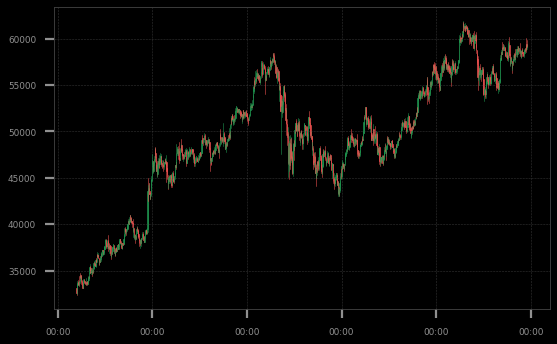

In [450]:
ohlc_plot(d1h)

# Parameters permutations

<hr/>

How to get all parameteres permutations (product) including additional restrictions ?

For example: p1 may take values 10, 20, 30, and p2 takes 70, 80, 90

restriction p1 + p2 == 100:

In [23]:
ps = permutate_params({
        'p1': [10, 20, 30],
        'p2': [90, 80, 70],
    },
    conditions=[
        lambda p1, p2: p1 + p2 == 100,
    ]
)
ps 

[{'p1': 10, 'p2': 90}, {'p1': 20, 'p2': 80}, {'p1': 30, 'p2': 70}]

In [32]:
def some_function(p1, p2):
    print(f"p1={p1} p2={p2}")
    
[some_function(**p) for p in ps]

[None, None, None]